In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
# Clear any logs from previous runs
#rm -rf ./logs/

In [1]:
# Load Mnist data 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

NameError: name 'tf' is not defined

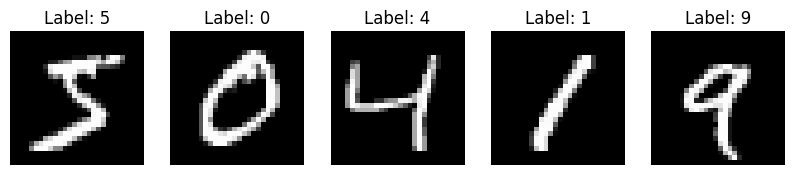

In [18]:
# Display 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')  # Use grayscale for better visualization
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')  # Removes the axis ticks if set to off
plt.show()

In [19]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),# randomly turns off 20% of input to zero to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')# like hard & Soft voting in Ensemble learning
  ])
model = create_model()

In [20]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [21]:
#model.fit(x_train, y_train, epochs=6)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=6, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8542 - loss: 0.4906 - val_accuracy: 0.9566 - val_loss: 0.1438
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9546 - loss: 0.1538 - val_accuracy: 0.9690 - val_loss: 0.1053
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.1081 - val_accuracy: 0.9752 - val_loss: 0.0825
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0867 - val_accuracy: 0.9767 - val_loss: 0.0785
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0711 - val_accuracy: 0.9773 - val_loss: 0.0744
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0629 - val_accuracy: 0.9783 - val_loss: 0.0739


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Printed results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9742 - loss: 0.0849
Test Loss: 0.0739
Test Accuracy: 0.9783


In [23]:
history = model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0539
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0492
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0451
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9867 - loss: 0.0415
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0379
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0366


In [24]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

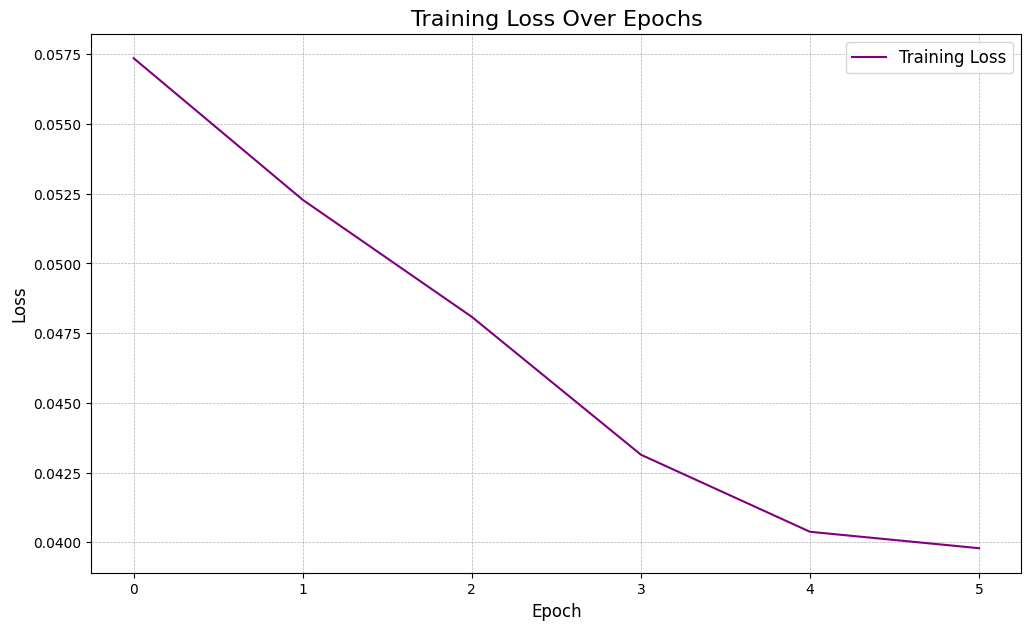

In [25]:
plt.figure(figsize=(12, 7))  
plt.plot(train_loss, color='purple', label='Training Loss')  # Changed color to purple
plt.title('Training Loss Over Epochs', fontsize=16)  
plt.xlabel('Epoch', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 
plt.grid(True, linestyle='--', linewidth=0.5)  # Changed grid style
plt.show()

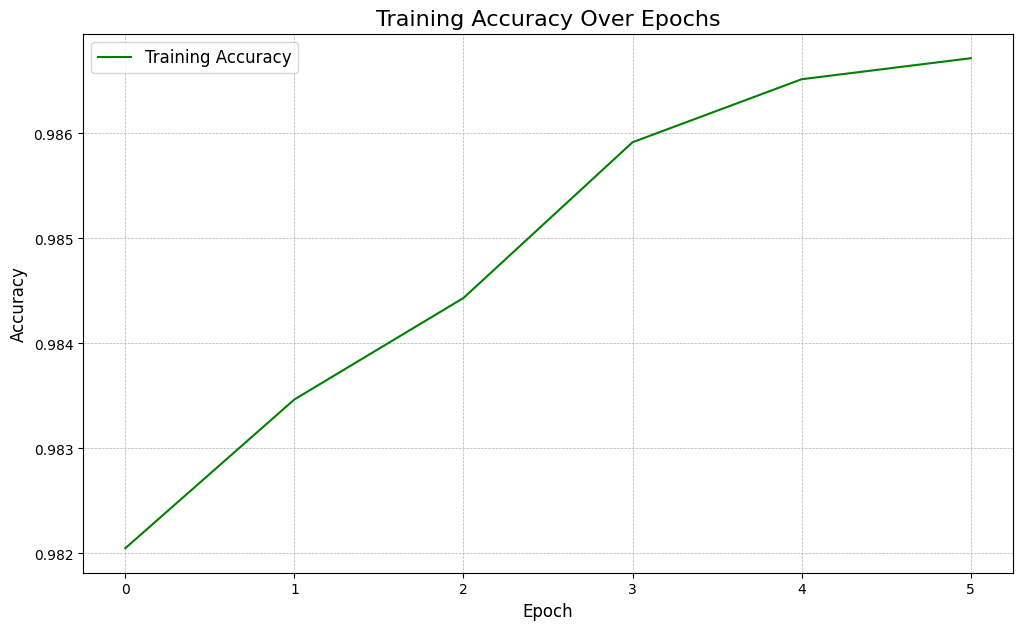

In [26]:
plt.figure(figsize=(12, 7))  
plt.plot(train_acc, color='green', label='Training Accuracy')  # Changed color to green
plt.title('Training Accuracy Over Epochs', fontsize=16)  
plt.xlabel('Epoch', fontsize=12)  
plt.ylabel('Accuracy', fontsize=12)  
plt.legend(fontsize=12)  
plt.grid(True, linestyle='--', linewidth=0.5)  # Changed grid style
plt.show()